### import everything

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.datasets import make_moons

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

### 製作2維資料

In [3]:
data, label = make_moons(n_samples=500, noise=0.2, random_state=0)
label = label.reshape(500, 1)

In [8]:
print('data shape :', data.shape)
print(data[:5], '\n')
print('label shape:', label.shape)
print(label[:5])

data shape : (500, 2)
[[ 0.30240233  0.89623817]
 [-0.38598275  0.48730979]
 [ 0.19020931  0.11325428]
 [ 1.71457157 -0.11033049]
 [ 1.96706272 -0.5158008 ]] 

label shape: (500, 1)
[[0]
 [1]
 [1]
 [1]
 [1]]


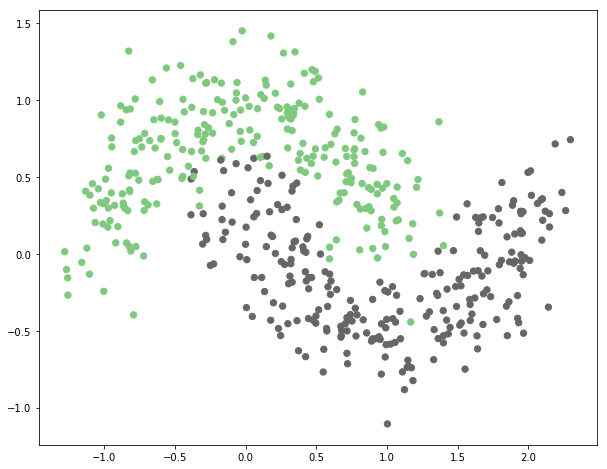

In [10]:
# draw picture
plt.scatter(data[:,0], data[:,1], s=40, c=label, cmap=plt.cm.Accent)

### 使用tensorflow撰寫logistic regression

In [11]:
sess = tf.InteractiveSession()

In [12]:
# tf Graph Input
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1]) 

# Set model weights
W = tf.Variable(tf.zeros([2, 1]))
b = tf.Variable(tf.zeros([1]))

# Logistic regression without sigmoid activation
predict = tf.matmul(x,W) + b

In [13]:
# Cross entropy
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=y, logits=predict))

In [ ]:
# SGD
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

### 更新權重一次

In [15]:
sess.run(tf.global_variables_initializer())

In [16]:
_, c = sess.run([optimizer, cost], feed_dict={x: data, y: label})
print('cost:', c)

cost: 0.693146


### sigmoid function

In [18]:
def sigmoid(x): 
    return 1.0 / (1.0 + np.exp(-x))

### 使用現在的模型預測

In [21]:
feed_dict = {x: data}
classification = sess.run(predict, feed_dict)
classification = sigmoid(classification)
classification[classification>=0.5] = 1
classification[classification<0.5] = 0
classification[:30]

array([[ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.]], dtype=float32)

In [29]:
print('Accuary:', float(sum(label == classification)[0])  / label.shape[0])

Accuary: 0.78


### 劃出預測邊界

In [32]:
def plot_decision_boundary(X, y, model):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
                         np.arange(y_min, y_max, h))
    pred_every_point = np.c_[xx.ravel(), yy.ravel()]
    feed_dict = {x: pred_every_point}
    Z = sess.run(model, feed_dict)
    Z = sigmoid(Z)
    Z[Z>=0.5] = 1
    Z[Z<0.5] = 0
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], s=40,  c=y, cmap=plt.cm.BuGn)

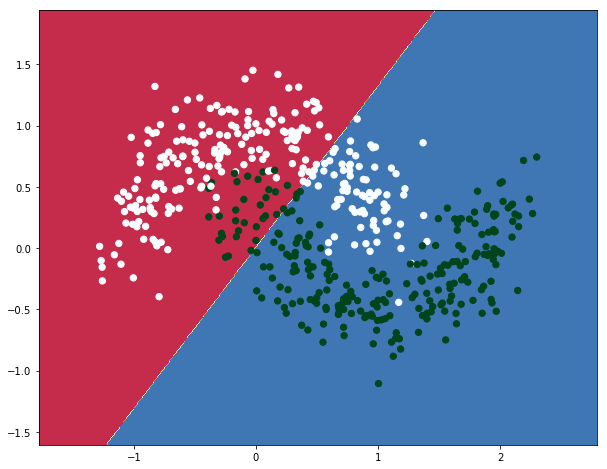

In [33]:
plot_decision_boundary(data, label, predict)

# 疊代20000次

In [34]:
for i in range(20000):
    _, c = sess.run([optimizer, cost], feed_dict={x: data, y: label})
    if i % 1000 == 0:
        print("epoch:{}, cost:{}".format(i, c))

epoch:0, cost:0.6921938061714172
epoch:1000, cost:0.4044242799282074
epoch:2000, cost:0.3571247458457947
epoch:3000, cost:0.3367195129394531
epoch:4000, cost:0.32483693957328796
epoch:5000, cost:0.31701916456222534
epoch:6000, cost:0.31155937910079956
epoch:7000, cost:0.3076096177101135
epoch:8000, cost:0.30468180775642395
epoch:9000, cost:0.30247071385383606
epoch:10000, cost:0.300775408744812
epoch:11000, cost:0.29945892095565796
epoch:12000, cost:0.29842546582221985
epoch:13000, cost:0.29760676622390747
epoch:14000, cost:0.29695287346839905
epoch:15000, cost:0.2964269816875458
epoch:16000, cost:0.29600152373313904
epoch:17000, cost:0.29565539956092834
epoch:18000, cost:0.29537254571914673
epoch:19000, cost:0.2951403260231018


In [37]:
feed_dict = {x: data}
classification = sess.run(predict, feed_dict)
classification = sigmoid(classification)
classification[classification>=0.5] = 1
classification[classification<0.5] = 0

print('Accuary:', float(sum(label == classification)[0])  / label.shape[0])

Accuary: 0.862


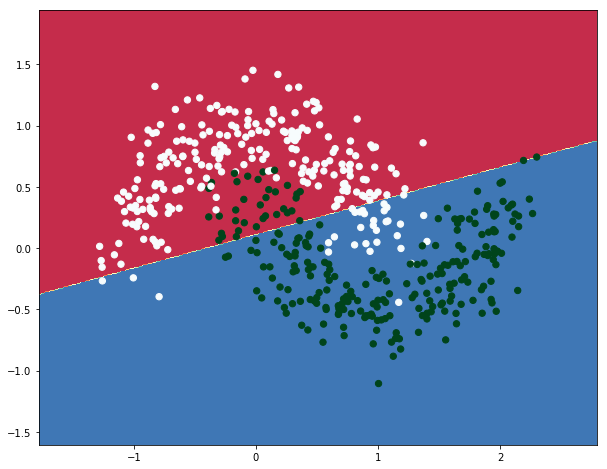

In [35]:
plot_decision_boundary(data, label, predict)

# Your turn!

* 調整Learning Rate，對收斂速度有何影響?